In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
len(set(train_labels))

46

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [12]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: 2.6934 - acc: 0.5291 - val_loss: 1.8268 - val_acc: 0.6460
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4722 - acc: 0.6996 - val_loss: 1.3484 - val_acc: 0.6930
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0804 - acc: 0.7692 - val_loss: 1.1564 - val_acc: 0.7460
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8494 - acc: 0.8210 - val_loss: 1.0414 - val_acc: 0.7690
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6769 - acc: 0.8579 - val_loss: 0.9672 - val_acc: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5423 - acc: 0.8895 - val_loss: 0.9135 - val_acc: 0.8170
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4438 - acc: 0.9082 - val_loss: 0.9157 - val_acc: 0.7980
Epoch 8/20
16/16 [==============================] - 0s 17ms/step - loss: 0.3606 - a

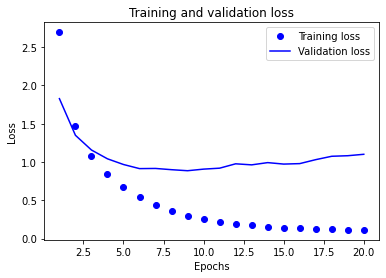

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

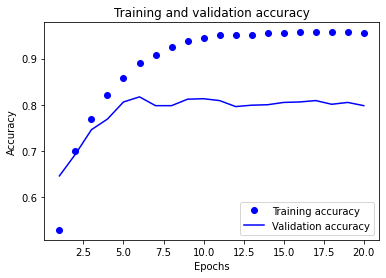

In [19]:
plt.clf()

loss = history.history['acc']
val_loss = history.history['val_acc']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=9, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 20ms/step - loss: 2.5020 - acc: 0.5076 - val_loss: 1.6473 - val_acc: 0.6590
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.3567 - acc: 0.7144 - val_loss: 1.2679 - val_acc: 0.7180
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.0113 - acc: 0.7863 - val_loss: 1.1255 - val_acc: 0.7480
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 0.7966 - acc: 0.8334 - val_loss: 1.0273 - val_acc: 0.7930
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6266 - acc: 0.8735 - val_loss: 0.9555 - val_acc: 0.8110
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4993 - acc: 0.9018 - val_loss: 0.9107 - val_acc: 0.8120
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.3970 - acc: 0.9199 - val_loss: 0.8948 - val_acc: 0.8140
Epoch 8/9
16/16 [==============================] - 0s 14ms/step - loss: 0.3327 - acc: 0.92

In [21]:
results

[0.9810448884963989, 0.7796081900596619]

In [22]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19011576135351738

In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

1.0

In [26]:
np.argmax(predictions[0])

3

In [27]:
x_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=128, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 2.7517 - acc: 0.3317 - val_loss: 2.1493 - val_acc: 0.5550
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.8177 - acc: 0.5727 - val_loss: 1.6879 - val_acc: 0.5830
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.4645 - acc: 0.6159 - val_loss: 1.5488 - val_acc: 0.6190
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2547 - acc: 0.6746 - val_loss: 1.4349 - val_acc: 0.6620
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1017 - acc: 0.7156 - val_loss: 1.3849 - val_acc: 0.6950
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9901 - acc: 0.7447 - val_loss: 1.3756 - val_acc: 0.7060
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9091 - acc: 0.7694 - val_loss: 1.3643 - val_acc: 0.7040
Epoch 8/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8374 - acc: 0.78

[2.3010342121124268, 0.6905609965324402]

Further experiments

In [29]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/20
16/16 [==============================] - 0s 15ms/step - loss: 3.0529 - acc: 0.4371 - val_loss: 2.3051 - val_acc: 0.5800
Epoch 2/20
16/16 [==============================] - 0s 10ms/step - loss: 1.9244 - acc: 0.6310 - val_loss: 1.6487 - val_acc: 0.6600
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 1.4161 - acc: 0.7117 - val_loss: 1.3549 - val_acc: 0.7110
Epoch 4/20
16/16 [==============================] - 0s 10ms/step - loss: 1.1418 - acc: 0.7591 - val_loss: 1.2011 - val_acc: 0.7350
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.9648 - acc: 0.7962 - val_loss: 1.1155 - val_acc: 0.7540
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.8372 - acc: 0.8202 - val_loss: 1.0423 - val_acc: 0.7710
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.7276 - acc: 0.8404 - val_loss: 1.0045 - val_acc: 0.7770
Epoch 8/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6378 - a

[1.1151570081710815, 0.7818343639373779]

In [30]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 2.1742 - acc: 0.5454 - val_loss: 1.3849 - val_acc: 0.6840
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.1478 - acc: 0.7541 - val_loss: 1.1210 - val_acc: 0.7500
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 0.7985 - acc: 0.8317 - val_loss: 1.0526 - val_acc: 0.7760
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5892 - acc: 0.8735 - val_loss: 0.9077 - val_acc: 0.8070
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4275 - acc: 0.9079 - val_loss: 0.9126 - val_acc: 0.8100
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.3203 - acc: 0.9328 - val_loss: 0.9158 - val_acc: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.2527 - acc: 0.9445 - val_loss: 0.8801 - val_acc: 0.8260
Epoch 8/20
16/16 [==============================] - 0s 19ms/step - loss: 0.2133 - a

[1.295946478843689, 0.7818343639373779]

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=10, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/10
16/16 [==============================] - 1s 19ms/step - loss: 2.5892 - acc: 0.5568 - val_loss: 1.8345 - val_acc: 0.6440
Epoch 2/10
16/16 [==============================] - 0s 15ms/step - loss: 1.4815 - acc: 0.7171 - val_loss: 1.3752 - val_acc: 0.7230
Epoch 3/10
16/16 [==============================] - 0s 14ms/step - loss: 1.0842 - acc: 0.7846 - val_loss: 1.1545 - val_acc: 0.7580
Epoch 4/10
16/16 [==============================] - 0s 14ms/step - loss: 0.8483 - acc: 0.8299 - val_loss: 1.0244 - val_acc: 0.7900
Epoch 5/10
16/16 [==============================] - 0s 14ms/step - loss: 0.6808 - acc: 0.8661 - val_loss: 0.9472 - val_acc: 0.8130
Epoch 6/10
16/16 [==============================] - 0s 15ms/step - loss: 0.5532 - acc: 0.8896 - val_loss: 0.8916 - val_acc: 0.8190
Epoch 7/10
16/16 [==============================] - 0s 16ms/step - loss: 0.4564 - acc: 0.9116 - val_loss: 0.8708 - val_acc: 0.8190
Epoch 8/10
16/16 [==============================] - 0s 16ms/step - loss: 0.3796 - a

[0.9099269509315491, 0.7956367135047913]

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=10, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/10
16/16 [==============================] - 1s 20ms/step - loss: 2.5963 - acc: 0.4579 - val_loss: 1.7103 - val_acc: 0.6290
Epoch 2/10
16/16 [==============================] - 0s 14ms/step - loss: 1.4577 - acc: 0.6902 - val_loss: 1.3699 - val_acc: 0.7090
Epoch 3/10
16/16 [==============================] - 0s 16ms/step - loss: 1.1095 - acc: 0.7549 - val_loss: 1.1725 - val_acc: 0.7480
Epoch 4/10
16/16 [==============================] - 0s 16ms/step - loss: 0.8705 - acc: 0.8062 - val_loss: 1.0641 - val_acc: 0.7810
Epoch 5/10
16/16 [==============================] - 0s 15ms/step - loss: 0.6996 - acc: 0.8430 - val_loss: 0.9901 - val_acc: 0.7890
Epoch 6/10
16/16 [==============================] - 0s 14ms/step - loss: 0.5567 - acc: 0.8748 - val_loss: 0.9653 - val_acc: 0.7890
Epoch 7/10
16/16 [==============================] - 0s 15ms/step - loss: 0.4453 - acc: 0.9004 - val_loss: 0.9939 - val_acc: 0.7890
Epoch 8/10
16/16 [==============================] - 0s 17ms/step - loss: 0.3518 - a

[1.1298471689224243, 0.7684773206710815]

In [33]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=10, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/10
16/16 [==============================] - 1s 24ms/step - loss: 2.2221 - acc: 0.5828 - val_loss: 1.4469 - val_acc: 0.7070
Epoch 2/10
16/16 [==============================] - 0s 18ms/step - loss: 1.1317 - acc: 0.7742 - val_loss: 1.0971 - val_acc: 0.7750
Epoch 3/10
16/16 [==============================] - 0s 18ms/step - loss: 0.7827 - acc: 0.8454 - val_loss: 0.9467 - val_acc: 0.8100
Epoch 4/10
16/16 [==============================] - 0s 18ms/step - loss: 0.5758 - acc: 0.8864 - val_loss: 0.8859 - val_acc: 0.8130
Epoch 5/10
16/16 [==============================] - 0s 21ms/step - loss: 0.4384 - acc: 0.9148 - val_loss: 0.8315 - val_acc: 0.8230
Epoch 6/10
16/16 [==============================] - 0s 19ms/step - loss: 0.3425 - acc: 0.9315 - val_loss: 0.8071 - val_acc: 0.8340
Epoch 7/10
16/16 [==============================] - 0s 19ms/step - loss: 0.2756 - acc: 0.9406 - val_loss: 0.8089 - val_acc: 0.8270
Epoch 8/10
16/16 [==============================] - 0s 21ms/step - loss: 0.2255 - a

[0.9461199045181274, 0.8005343079566956]